<a href="https://colab.research.google.com/github/Codequirk/CodSoft/blob/main/task_3_Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap


In [2]:
#Loading the datasets using features
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target


In [3]:
#dividing the dataset into train-test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
#Using logestic Regresssion
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [5]:
y_pred = model.predict(X_test)


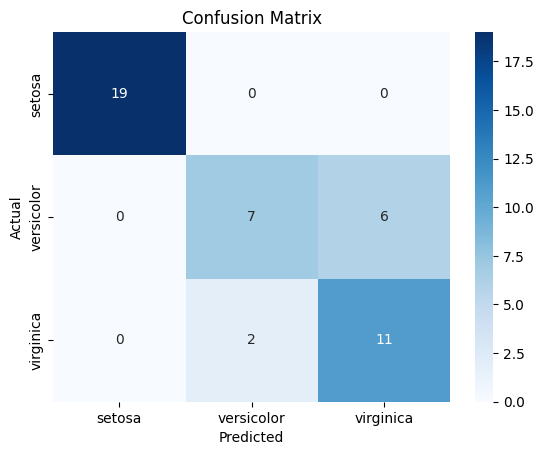

In [6]:
#Plotting the confusion matrixfor various catogories
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


0.8222222222222222


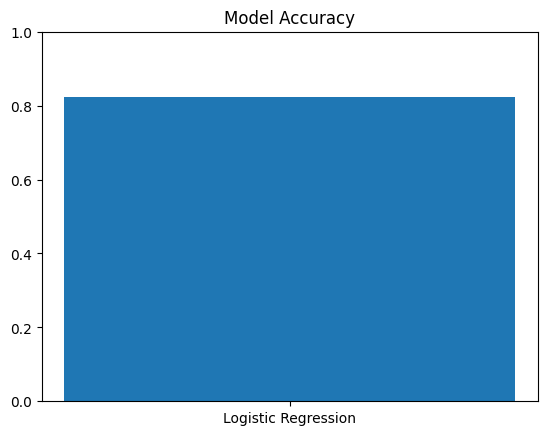

In [7]:
#Calculating accuracy score for logestic regression
acc = accuracy_score(y_test, y_pred)
print(acc)
plt.bar(["Logistic Regression"], [acc])
plt.title("Model Accuracy")
plt.ylim(0, 1)
plt.show()


In [12]:
#Comaprison between various algorithms- Logestic Regression,K-Nearest Neighbors,Supoort Vector Machine
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)


In [9]:
#Calculating average Accuracy using kfold methhod(dataset division of 5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=kf)
print("K-Fold Cross Validation Scores:", cv_scores)
print("Average Accuracy:", np.mean(cv_scores))


K-Fold Cross Validation Scores: [0.9        0.76666667 0.8        0.83333333 0.8       ]
Average Accuracy: 0.8200000000000001


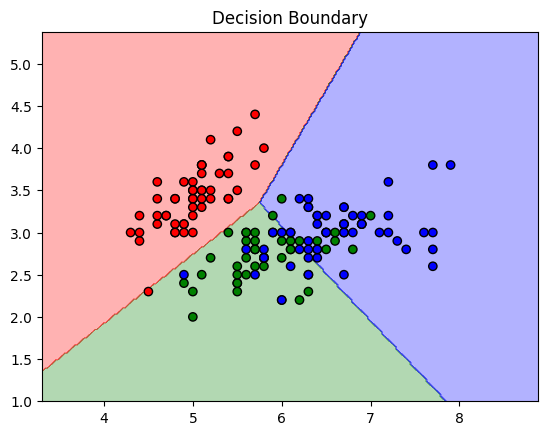

In [10]:
#Plotting the decision boundary graph using maximum and minimum length values
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(("red", "green", "blue")))
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(("red", "green", "blue")))
plt.title("Decision Boundary")
plt.show()


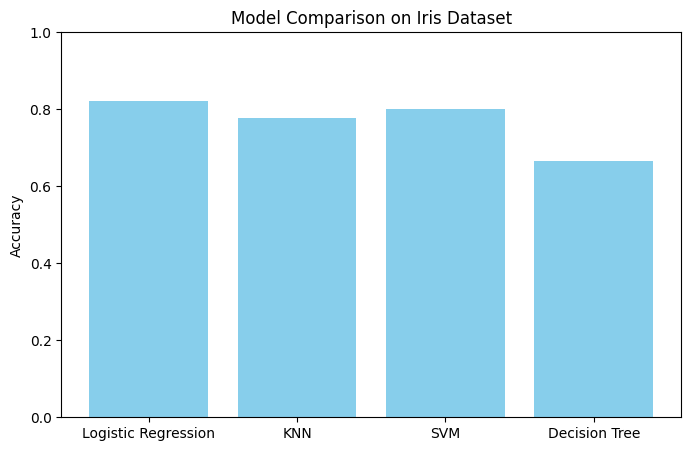

In [11]:
#Comparing various algorithem by plotting the resultent accuracy
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier()
}

accuracies = {}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    accuracies[name] = accuracy_score(y_test, pred)

# Bar chart
plt.figure(figsize=(8,5))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.ylabel("Accuracy")
plt.title("Model Comparison on Iris Dataset")
plt.ylim(0,1)
plt.show()


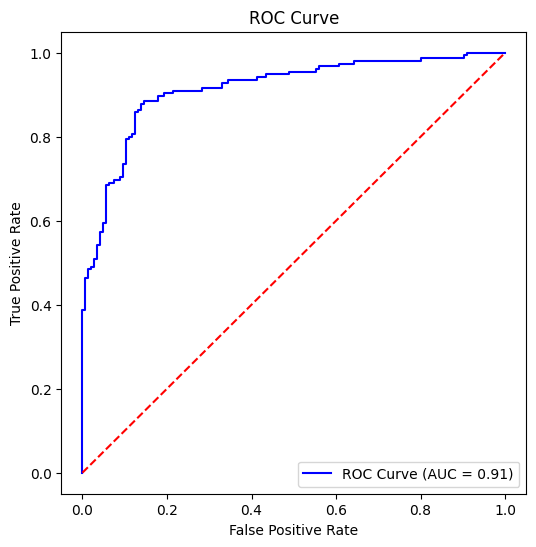

In [13]:
#Compute ROC curve and AUC score- Plot ROC curve
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification



X, y = make_classification(n_samples=1000, n_features=20,
                           n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


y_probs = model.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_probs)


roc_auc = auc(fpr, tpr)


plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # random guess line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()
